<a href="https://colab.research.google.com/github/Nihil-eng/knights_tour_problem/blob/main/knights_tour_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicializações necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from matplotlib import colors
from collections import deque

np.random.seed(1234)

def random_board(n):
    """Cria um tabuleiro de tamanho n x n com todas as casas inicializadas com -1."""
    return np.full((n, n), -1)

Funções comparativas que serão utilizadas ao decorrer dos algorítmos

In [2]:
"""
  funões para conferir se os possíveis movimentos do cavalo a partir de uma determinada casa (row, col)
"""

def get_valid_moves(board, n, row, col): 
    moves = []
    possible_moves = [(-2, -1), (-2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2), (2, -1), (2, 1)]
    
    for move in possible_moves:
        move_row = row + move[0]
        move_col = col + move[1]
        
        if is_valid_move(board, n, move_row, move_col):
            moves.append((move_row, move_col))
    
    return moves

def is_valid_move(board, n, row, col): # verifica se a casa em questão está nos parâmetros do tabuleiro e se já fora visitada anteriormente
    return 0 <= row < n and 0 <= col < n and board.item(row, col) == -1 

Função utilizada para mostrar o passo a passo das resoluções do problema:

In [3]:
def show_board(board, path, current_moves, predict_moves = 0, cols=['white', 'gray'], fontsize=18, show_as_circle = True,bfs = False):
    """Display the board with a knight at the specified position, the path, and the current possible moves."""


    n = len(board)

    # Create chess board display
    display = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            if ((i + j) % 2) != 0:
                display[i, j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap=cmap, norm=colors.NoNorm())
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the path by numbers
    for i in range(n):
        for j in range(n):
            if bfs == False:
                if board[i, j] != -1 and (i, j) not in current_moves and (((i, j) != path[-2] and predict_moves == 1) or ((i, j) != path[-1] and (predict_moves == 0))) :
                    plt.text(j, i, str(int(board[i, j])), fontsize=fontsize,
                            horizontalalignment='center', verticalalignment='center')
    if predict_moves == 1:
        knight_x, knight_y = path[-2]
    else: 
        knight_x, knight_y = path[-1]


    # Place the knight in the current position
    plt.text(knight_y, knight_x, u"\u265E", fontsize=34,
            horizontalalignment='center', verticalalignment='center')

    # Show the current possible moves
    for move in current_moves:
        if move in path and bfs == False:    
            move_row, move_col = move
            if show_as_circle:
                ax.add_patch(plt.Circle((move_col, move_row), 0.3, color='darkgreen', hatch='/\/\/\/\/\/', alpha=0.5))
            else:
                plt.text(move_col, move_row, 'O', fontsize=22, horizontalalignment='center', verticalalignment='center', weight = '1000', color='green', alpha=0.7)
        
        elif  bfs == True  and move not in path[0:]:
            move_row, move_col = move
            if show_as_circle:
                ax.add_patch(plt.Circle((move_col, move_row), 0.3, color='red', hatch='/\/\/\/\/\/', alpha=0.5))
            else:
                plt.text(move_col, move_row, 'X', fontsize=18, horizontalalignment='center', verticalalignment='center', weight = '1000', color='red', alpha=0.7)
        
        elif bfs == False:
            move_row, move_col = move
            if show_as_circle:
                ax.add_patch(plt.Circle((move_col, move_row), 0.3, color='red', hatch='/\/\/\/\/\/', alpha=0.5))
            else:
                plt.text(move_col, move_row, 'X', fontsize=18, horizontalalignment='center', verticalalignment='center', weight = '1000', color='red', alpha=0.7)
    if bfs == True:
        for i, pos in enumerate(path):
            x, y = pos
            plt.text(y, x, str(i), fontsize=fontsize,
            horizontalalignment='center', verticalalignment='center')

    
    plt.show()

# **Implementação de solução através de escolhas aleatórias:**
Ainda que uma versão que dependa completamente da aleatoriedade é possivel se alcançar uma quantidade de casas próximas ou mesmo ao resultado esperado em sí, por ser um pouco mais simples que o restante se torna também mais rápido de se executar, embora nesse caso, impreciso 

In [4]:
def solve_by_random(board, n, row, col, move_count, show_path, path):
    if move_count == n**2:
        return True

    moves = get_valid_moves(board, n, row, col)    
    
    if moves:
        move = random.choice(moves)
        move_row, move_col = move
        board[move_row][move_col] = move_count
        path.append(move)
        if show_path:
            show_board(board, path, moves, 1)

        move_count += 1
        if solve_by_random(board, n, move_row, move_col, move_count, show_path, path):
            if show_path == True:
                return print('solução encontrada')
            else:
                size = len(path)
                return path, size
    else:
        if show_path == True: 
            show_board(board, path, moves)
            return print('solução não encontrada, casas ocupadas:', move_count, 'de',n**2)         
        else:
            size = len(path)
            return path, size

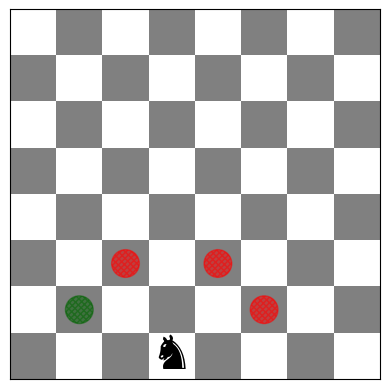

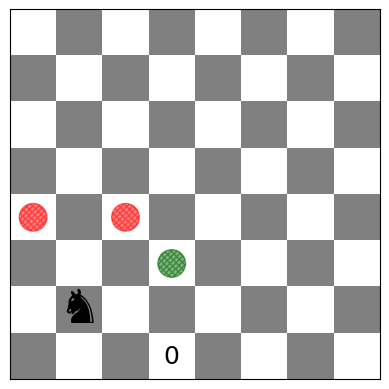

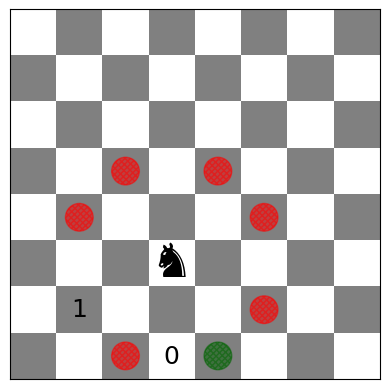

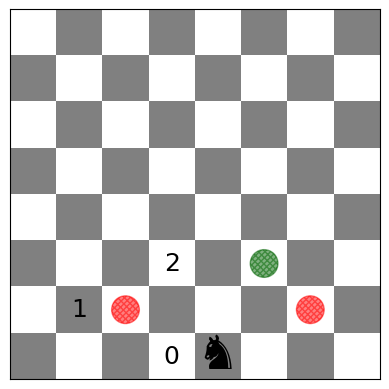

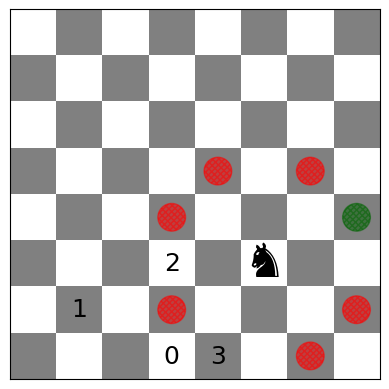

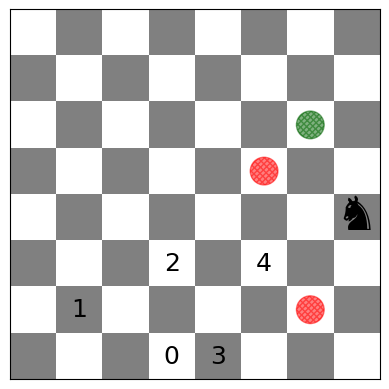

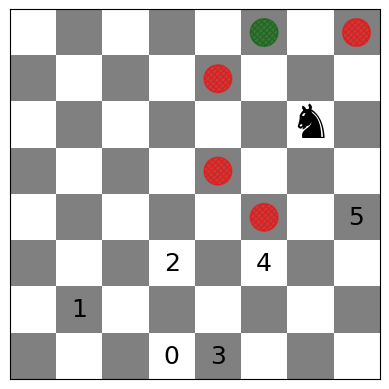

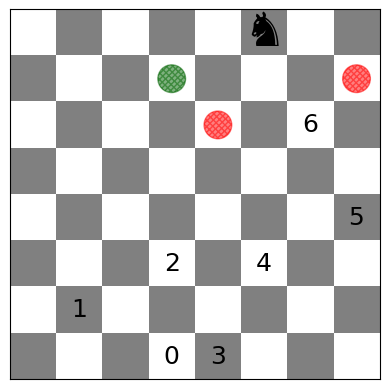

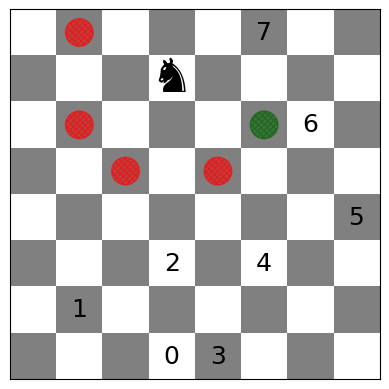

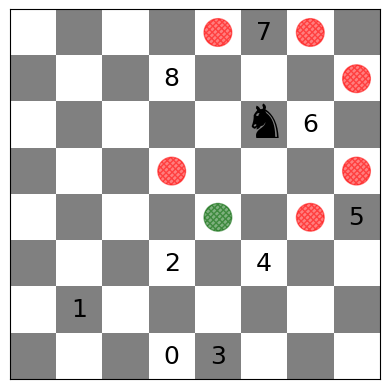

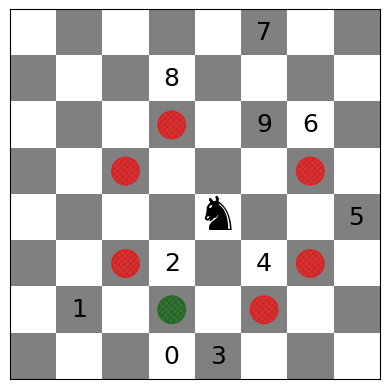

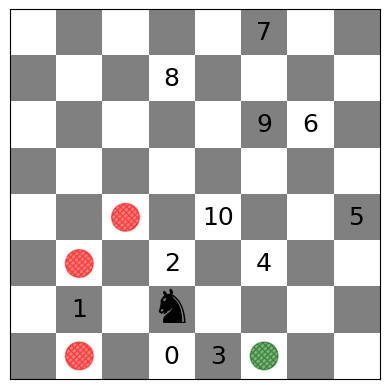

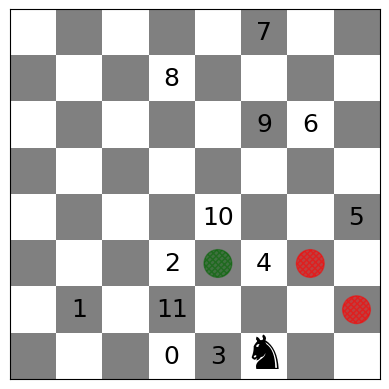

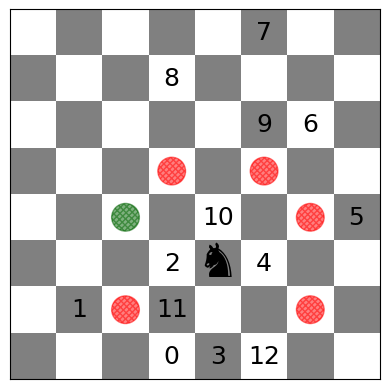

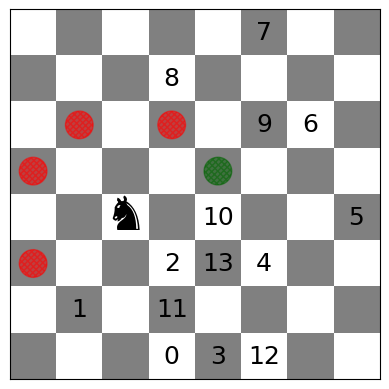

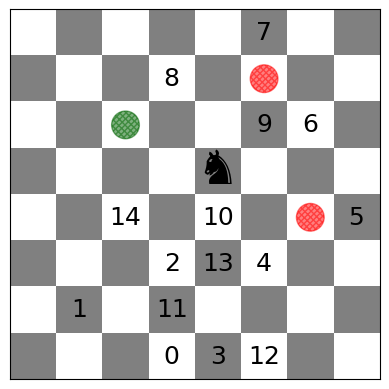

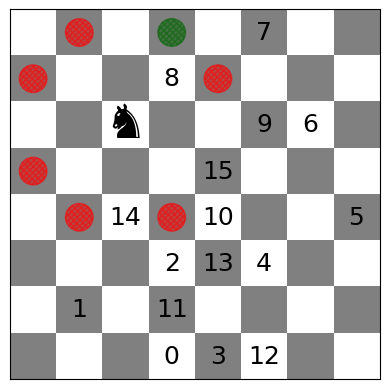

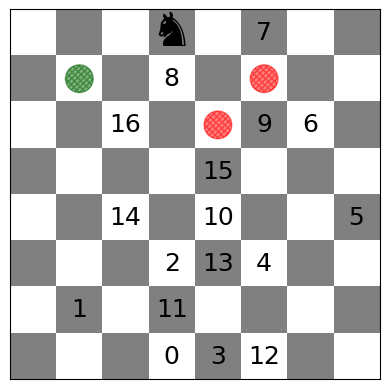

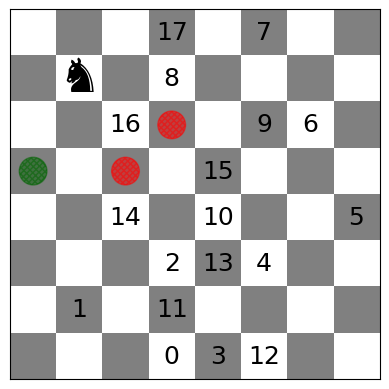

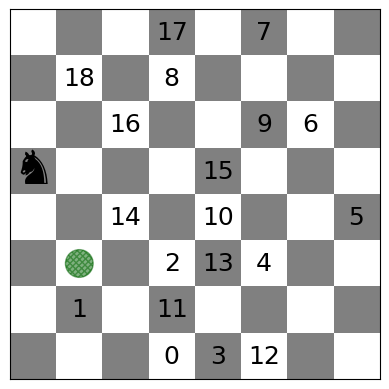

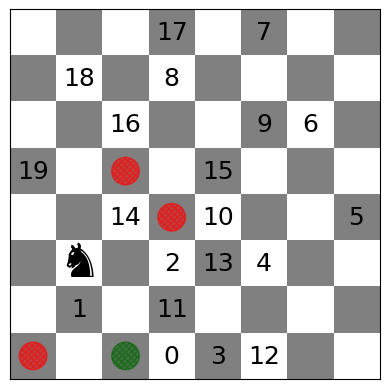

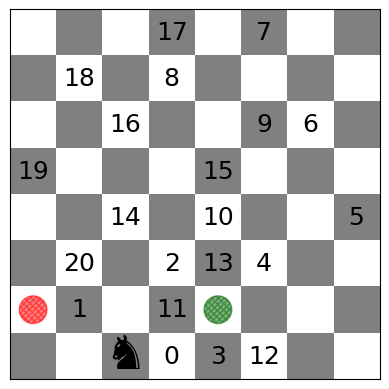

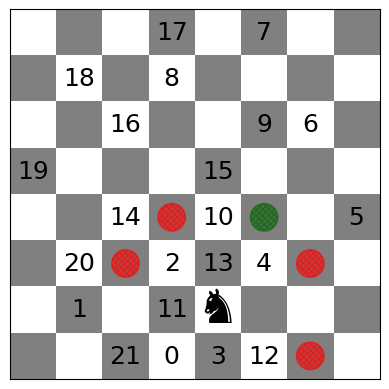

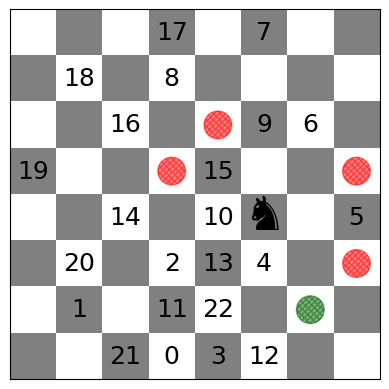

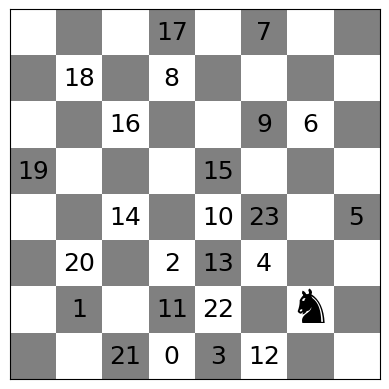

solução não encontrada, casas ocupadas: 25 de 64
tempo de execução:  3.98 s


In [5]:
n = 8 # Tamanho do tabuleiro

# Gerar uma posição inicial aleatória
start_row = np.random.randint(0, n)
start_col = np.random.randint(0, n)

# Criar o tabuleiro e definir a posição inicial do cavalo
board = random_board(n)
board[start_row][start_col] = 0
path = []
path.append((start_row, start_col))
# Resolver o problema do Passeio do Cavalo
t0 = time.time()
solve_by_random(board, n, start_row, start_col, 1, True, path)
t1 = time.time()
t = t1-t0
print("tempo de execução: ", f"{t:.2f}", "s")

#**Implementação de solução através de escolhas aleatórias com M repetições**
Nessa versão o algoritmo tentará encontrar a solução ao problema utilizando como base o algoritmo anterior, mas o repetindo determinado número de vezes e salvando o melhor caminho encontrado, ainda que o número de repetições seja consideravelmente alto (testados até 10 mil até o momento), o tempo de execução permanece baixo se comparado a algoritmos com uma complexidade alta como a implementação subsequente 

In [6]:
def show_better_path(better_path,board,row,col,n,tries):
    i = 1
    for move in better_path:
        if better_path:
            move_row, move_col = move
            board[move_row][move_col] = i
            row, col = better_path[i-1]
            i = i+1
            if i <= len(better_path):
              show_board(board,better_path[:i],(get_valid_moves(board, n, row, col)),1)
            else:
              show_board(board,better_path[:i],(get_valid_moves(board, n, row, col)))


    if len(better_path) == n**2:
       return print('solução encontrada! número de tentativas: ', tries)
    else:
       return print('solução não encontrada, casas ocupadas:', (len(better_path)+1), 'de',n**2) 
def solve_by_random_m_times(board, n, row, col, move_count, path_list, m, show_steps):
    better_path = []
    better_path.append((row,col))
    for i in range(m):
      new_board = board.copy()
      new_row = row
      new_col = col
      new_move_count = move_count

      path, total = solve_by_random(new_board, n, new_row, new_col, new_move_count, False, [])
      if total >= len(better_path):
          better_path = path
          t_moves = total
      if total == n**2:
        break

      if show_steps == True:
        print("tentativa ", (i+1), "- maior caminho: ",t_moves, "caminho atual: ",len(path))

    show_better_path(better_path,board,row,col,n, i)

tentativa  1 - maior caminho:  39 caminho atual:  39
tentativa  2 - maior caminho:  39 caminho atual:  31
tentativa  3 - maior caminho:  39 caminho atual:  34
tentativa  4 - maior caminho:  48 caminho atual:  48
tentativa  5 - maior caminho:  52 caminho atual:  52
tentativa  6 - maior caminho:  52 caminho atual:  15
tentativa  7 - maior caminho:  52 caminho atual:  28
tentativa  8 - maior caminho:  52 caminho atual:  27
tentativa  9 - maior caminho:  52 caminho atual:  25
tentativa  10 - maior caminho:  52 caminho atual:  26
tentativa  11 - maior caminho:  52 caminho atual:  40
tentativa  12 - maior caminho:  52 caminho atual:  38
tentativa  13 - maior caminho:  52 caminho atual:  35
tentativa  14 - maior caminho:  52 caminho atual:  18
tentativa  15 - maior caminho:  52 caminho atual:  36
tentativa  16 - maior caminho:  52 caminho atual:  32
tentativa  17 - maior caminho:  52 caminho atual:  37
tentativa  18 - maior caminho:  52 caminho atual:  47
tentativa  19 - maior caminho:  52 ca

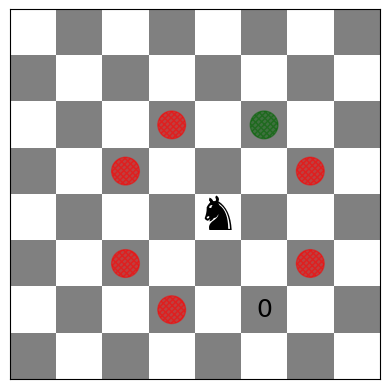

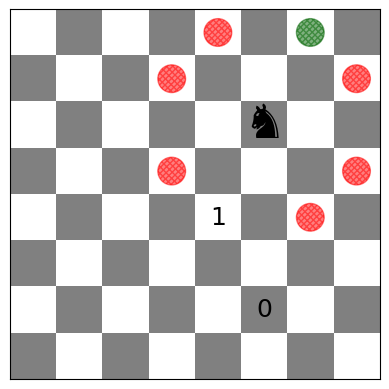

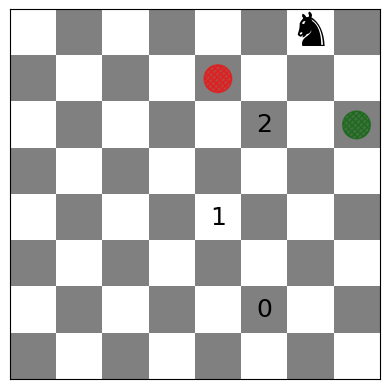

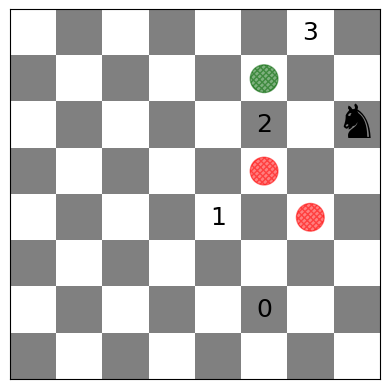

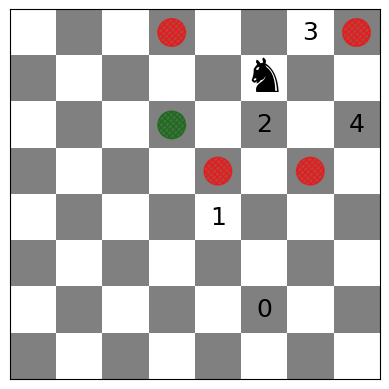

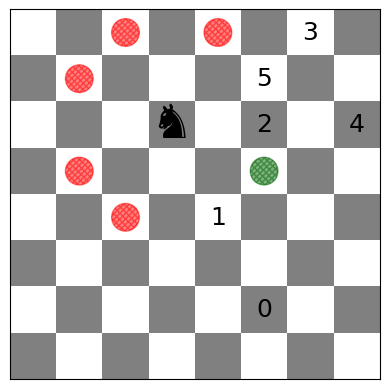

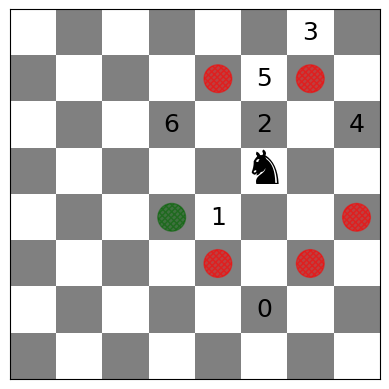

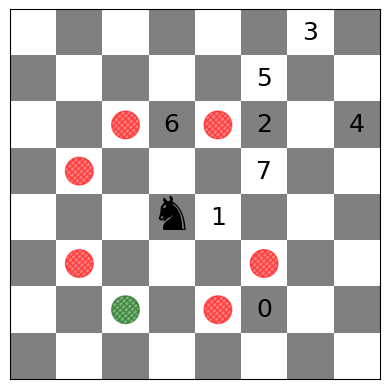

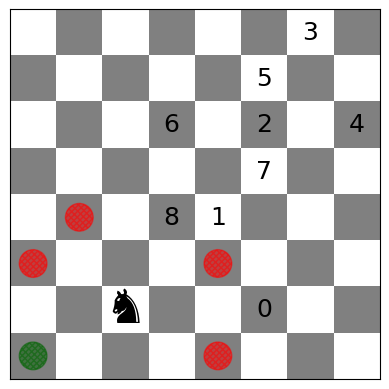

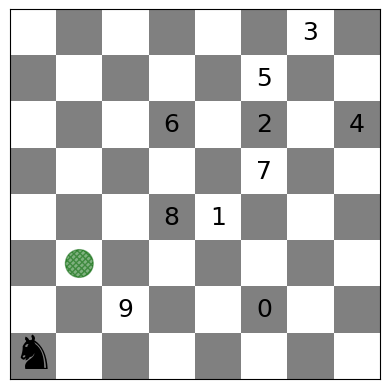

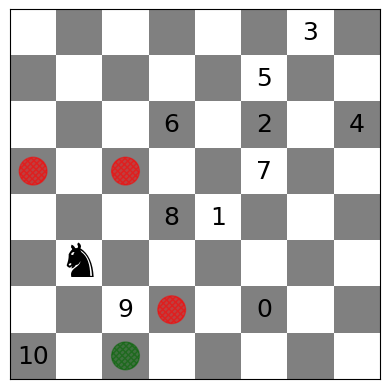

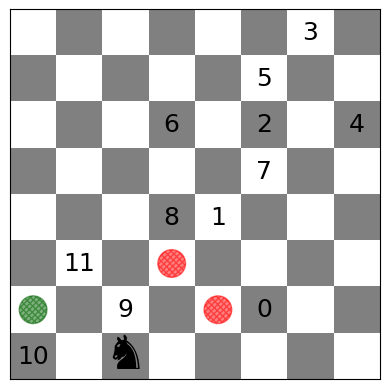

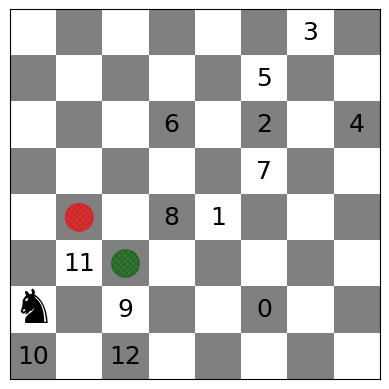

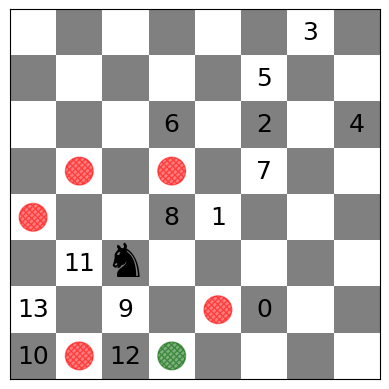

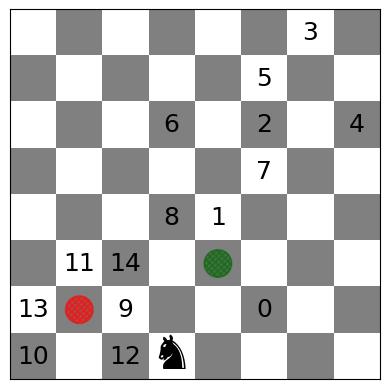

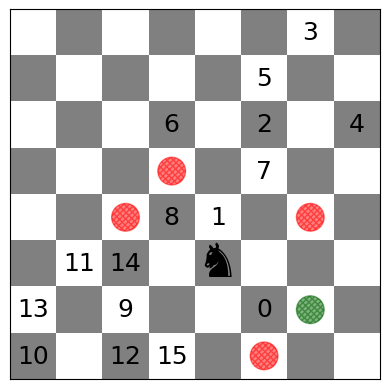

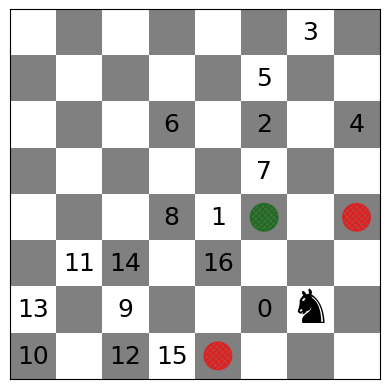

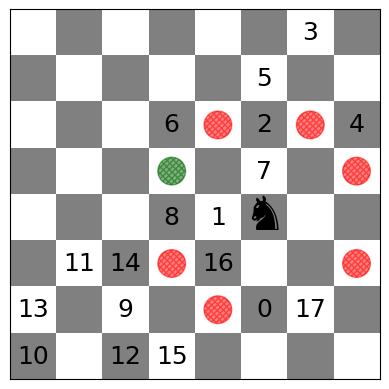

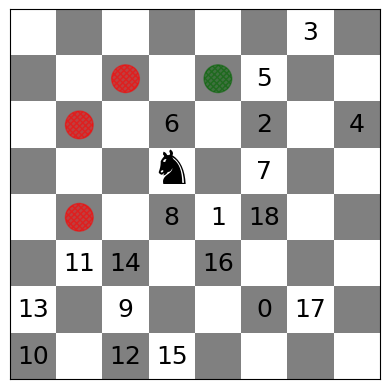

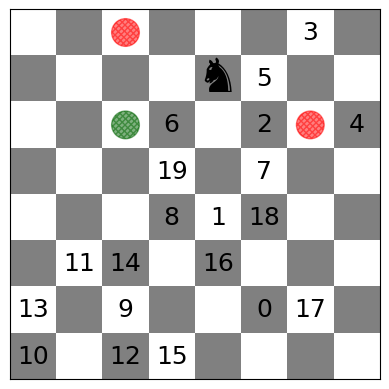

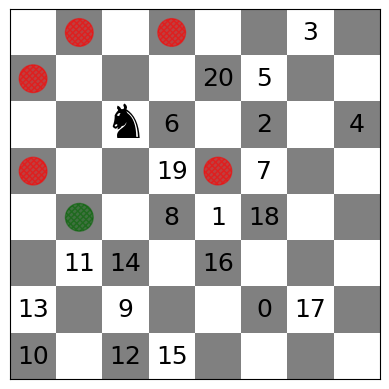

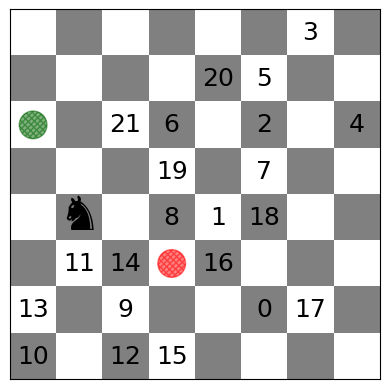

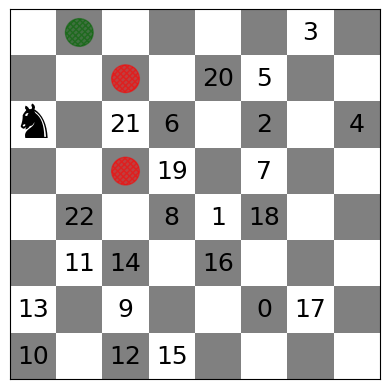

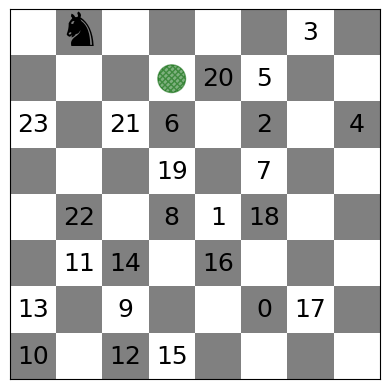

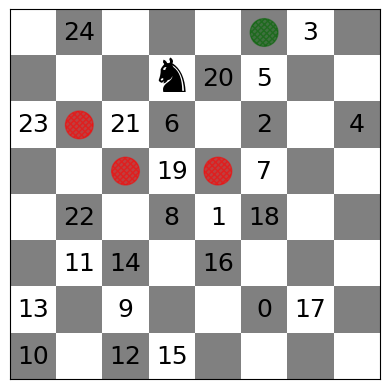

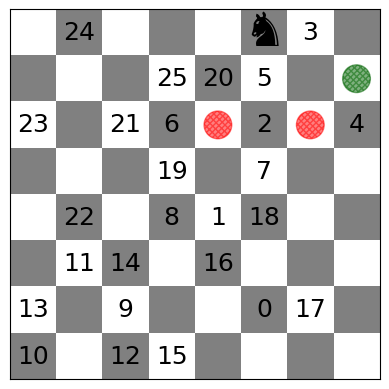

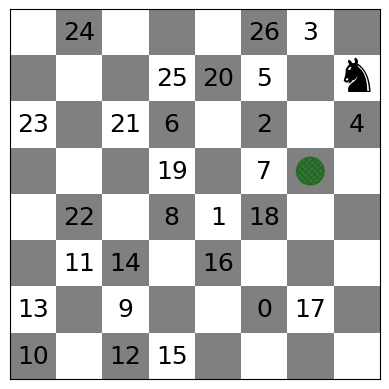

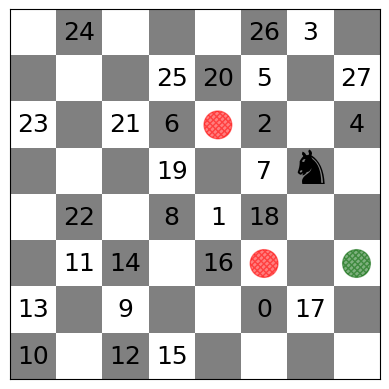

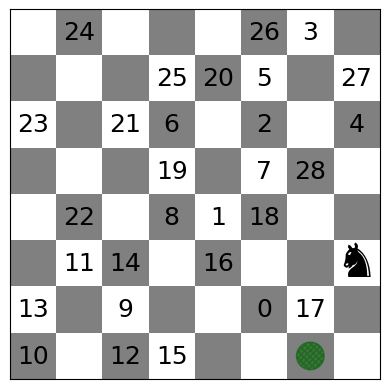

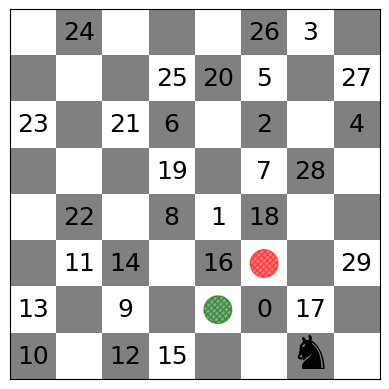

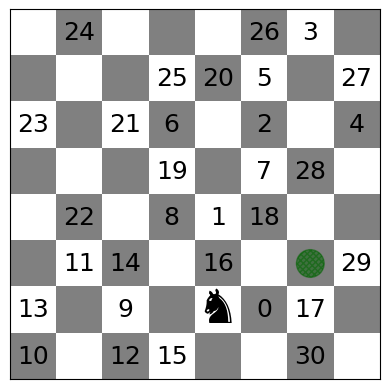

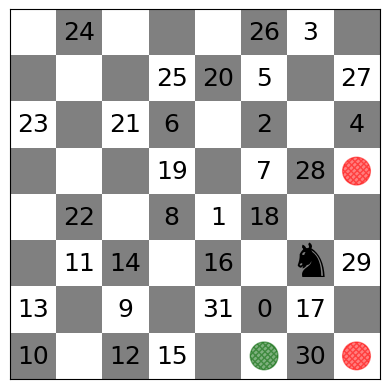

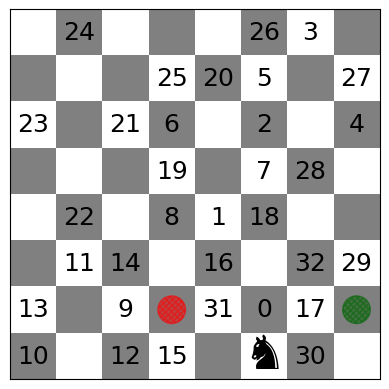

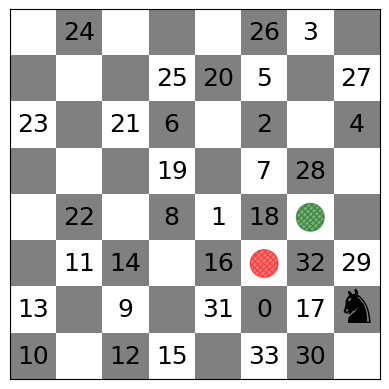

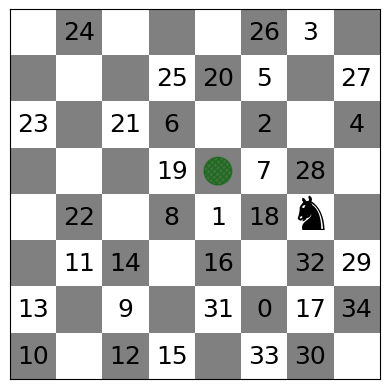

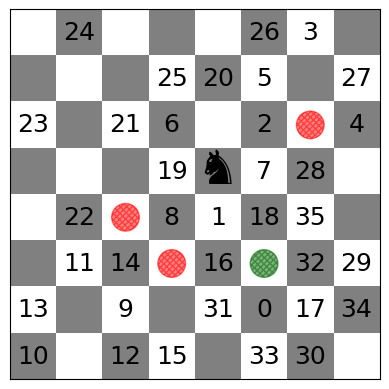

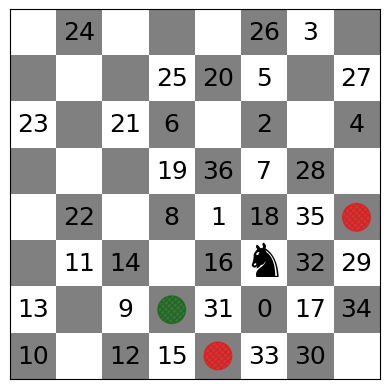

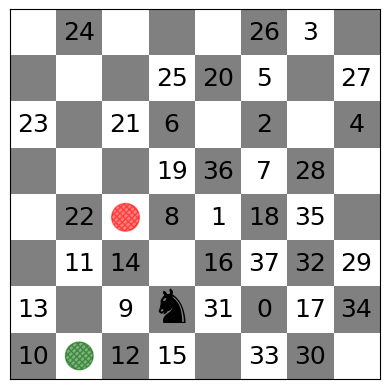

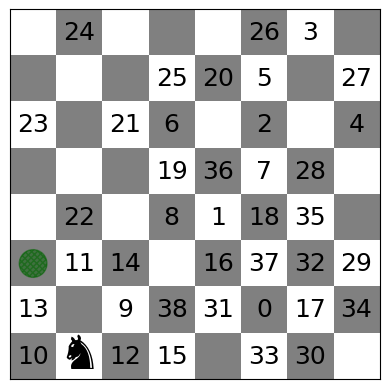

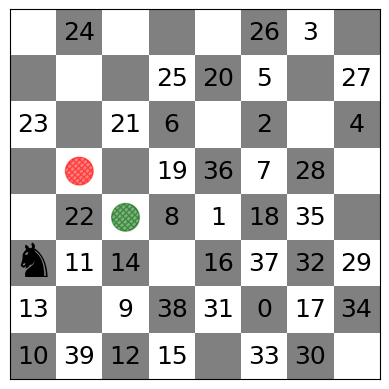

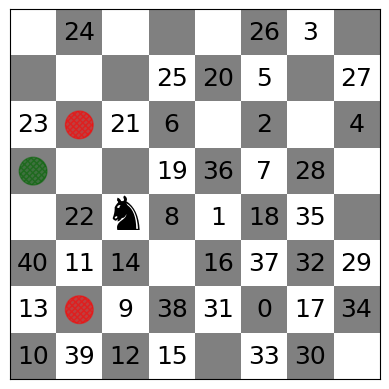

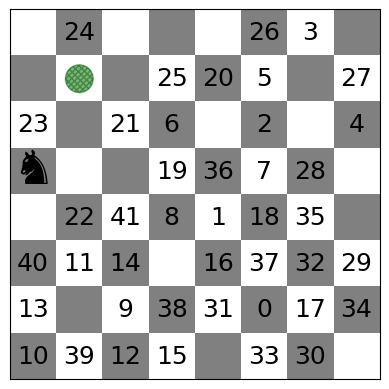

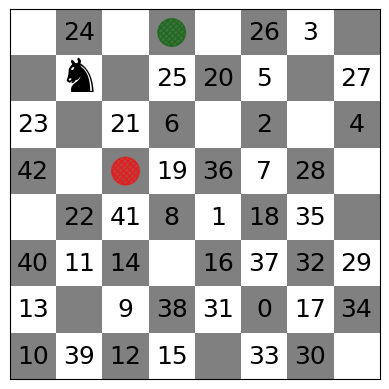

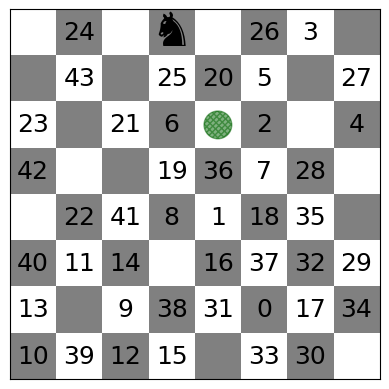

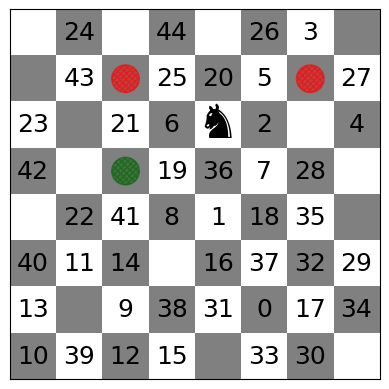

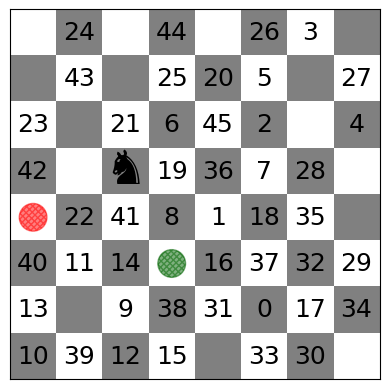

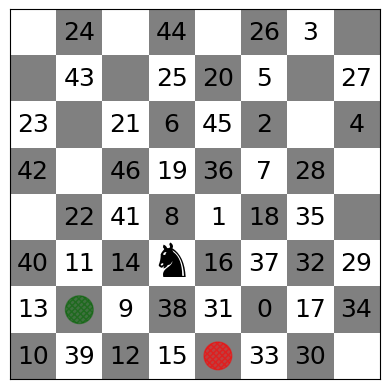

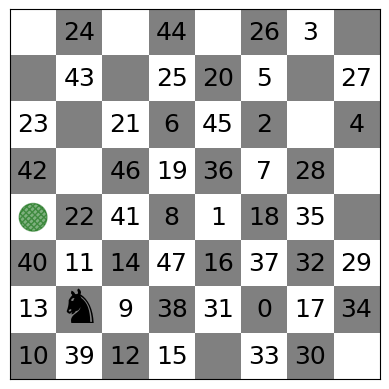

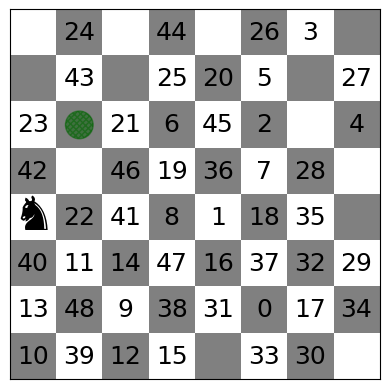

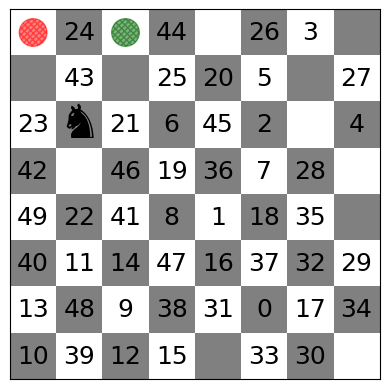

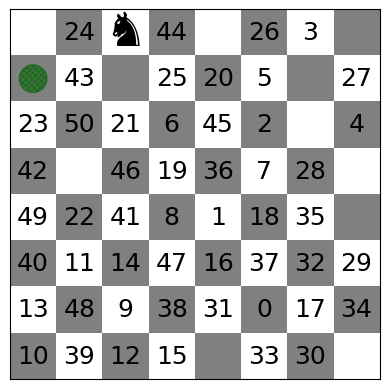

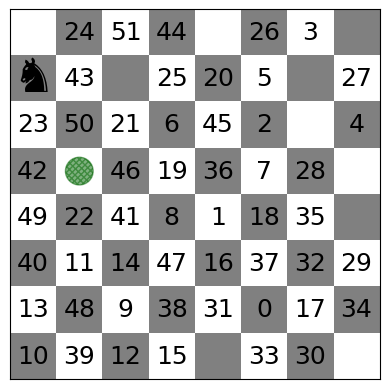

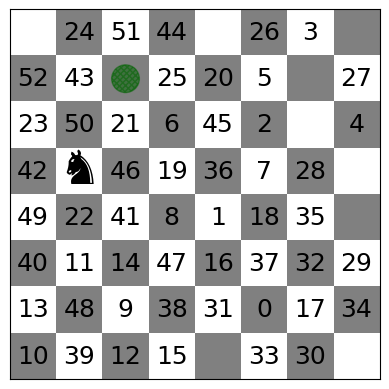

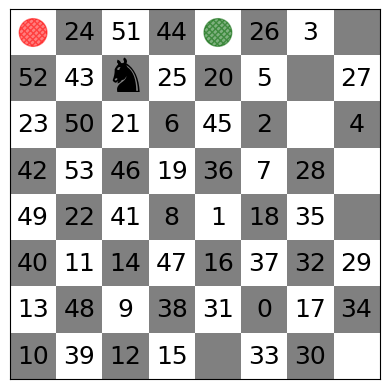

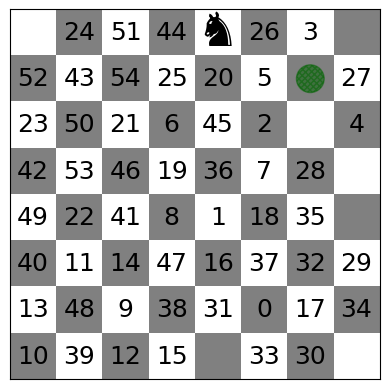

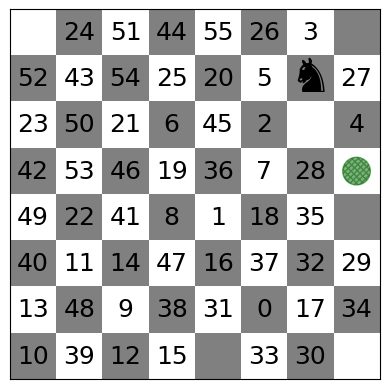

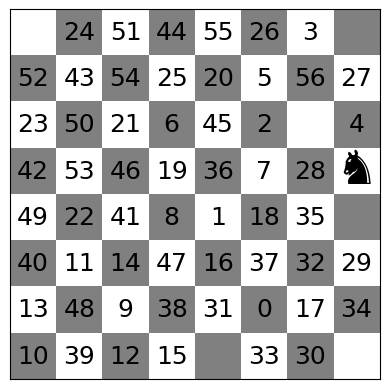

solução não encontrada, casas ocupadas: 58 de 64
tempo de execução:  11.67 s


In [7]:
n = 8 # Tamanho do tabuleiro

# Gerar uma posição inicial aleatória
start_row = np.random.randint(0, n)
start_col = np.random.randint(0, n)

# Criar o tabuleiro e definir a posição inicial do cavalo
board = random_board(n)
board[start_row][start_col] = 0
path = []

t0 = time.time()
solve_by_random_m_times(board, n, start_row, start_col, 1, path, 1000, True)
t1 = time.time()
t = t1-t0
print("tempo de execução: ", f"{t:.2f}", "s")

# **Implementação da busca em largura:**

O algoritmo de busca em largura(breadth-first search), ou busca BFS, por outro lado, garante que encontrará uma solução (caso aja uma) ao testar todas as possibilidades possíveis de movimentação, por outro lado, por testar todas as possibilidades possui um custo computacional muito maior e logo seu tempo de execução também, mesmo ao retirarmos a função que nos mostra os passos que estão sendo percorridos no momento 

In [8]:
def solve_by_BFS(board, n, row, col, show):
    queue = deque()
    queue.append([(row, col)])

    while queue:
        path = queue.popleft()
        current_row, current_col = path[-1]

        if len(path) == n**2:
            return path

        moves = get_valid_moves(board, n, current_row, current_col)

        for move in moves:
            move_row, move_col = move

            visited = np.zeros((n, n), dtype=bool)  # Reiniciar a matriz de casas visitadas
            visited[row, col] = True

            if not visited[move_row, move_col] and move not in path:
                visited[move_row, move_col] = True
                new_path = list(path)
                new_path.append((move_row, move_col))
                new_board = np.copy(board)  # Criar uma cópia do tabuleiro atual
                new_board[current_row, current_col] = -1  # Redefinir a casa anterior
                new_board[move_row, move_col] = len(new_path) - 1  # Marcar a nova casa
                queue.append(new_path)
                
                if show:
                    show_board(new_board, new_path, moves, 0, ['white', 'gray'], 18, True, True)

    return None


Encontrada uma solução:


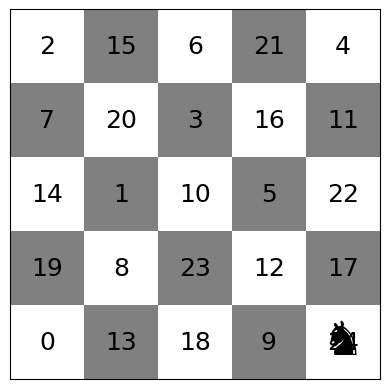

tempo de execução:  19.22 s


In [13]:
# Tamanho do tabuleiro
n = 5

# Posição inicial do cavalo
start_row = np.random.randint(0, n)
start_col = np.random.randint(0, n)

# Cria o tabuleiro
board = random_board(n)

# Resolve o problema do Passeio do Cavalo usando busca em largura
t0 = time.time()
solution = solve_by_BFS(board, n, start_row, start_col,False)
t1 = time.time()
t = t1-t0

if solution:
    print("Encontrada uma solução:")
    # Exibe o tabuleiro com a solução encontrada
    show_board(board, solution, [], 0, ['white', 'gray'], 18, True, True)

else:
    print("Não foi possível encontrar uma solução.")

print("tempo de execução: ", f"{t:.2f}", "s")

In [ ]:
# Tamanho do tabuleiro
n = 5

# Posição inicial do cavalo
start_row = np.random.randint(0, n)
start_col = np.random.randint(0, n)

# Cria o tabuleiro
board = random_board(n)

# Resolve o problema do Passeio do Cavalo usando busca em largura
t0 = time.time()
solution = solve_by_BFS(board, n, start_row, start_col,True)
t1 = time.time()
t = t1-t0


if solution:
    print("Encontrada uma solução:")
    # Exibe o tabuleiro com a solução encontrada
    show_board(board, solution, [], 0, ['white', 'gray'], 18, True, True)

else:
    print("Não foi possível encontrar uma solução.")

print("tempo de execução: ", f"{t:.2f}", "s")

# **Implementação de solução a partir do algoritmo de Backtracking com Heurística**

Essa é uma adaptação do algoritmo de Backtracking que utiliza uma heurística para solucionar o problema, essa heurística leva em conta os movimentos válidos para cada opção antes de se tomar uma decisão de qual casa ocupar, ou seja, enquanto o cavalo está na casa inicial marcada como zero, o algoritmo verá as possibilidades de movimento para cada possivel casa a partir da inicial, o algoritmo então escolherá a possibilidade que possui o menor numero de casas possíveis para se vizitar em seguida

In [9]:
def sort_moves_by_heuristic(board, n, moves):
    sorted_moves = []
    
    for move in moves:
        move_row, move_col = move
        count = 0
        
        for next_move in get_valid_moves(board, n, move_row, move_col):
            count += 1
        
        sorted_moves.append((move_row, move_col, count))
    
    sorted_moves.sort(key=lambda x: x[2])
    possible_moves = [tuple[:2] for tuple in sorted_moves]
    return possible_moves

def solve_by_backtracking(board, n, row, col, move_count, path):
    if move_count == n**2:
        return True

    moves = get_valid_moves(board, n, row, col)
    moves = sort_moves_by_heuristic(board, n, moves)
    
    path.append((row, col))
    
    # Exibir o tabuleiro com as marcações e os movimentos possíveis
    show_board(board, path, moves,1)

    for move in moves:
        move_row, move_col = move
        board[move_row][move_col] = move_count
        path.append(move)
        if solve_by_backtracking(board, n, move_row, move_col, move_count + 1, path):
            return True
            
    return False        


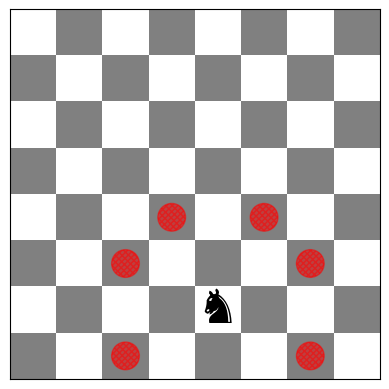

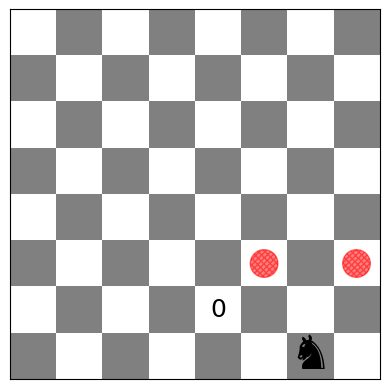

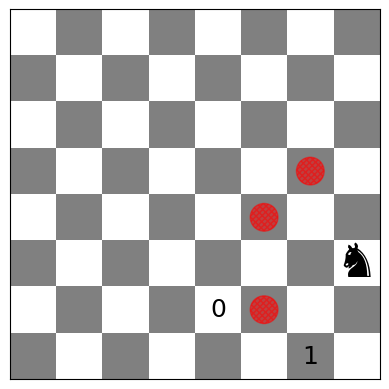

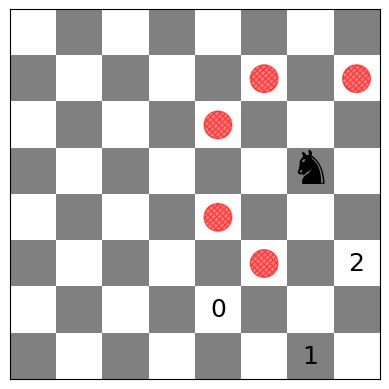

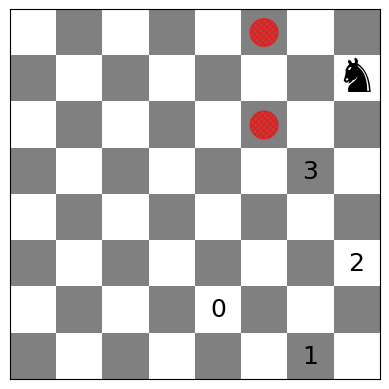

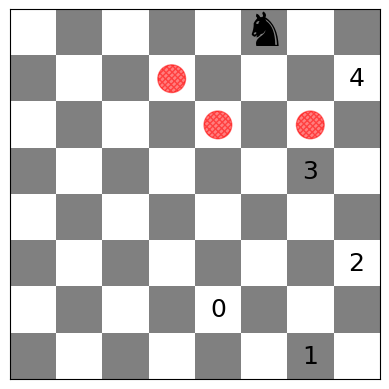

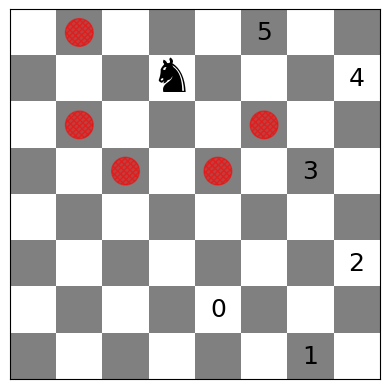

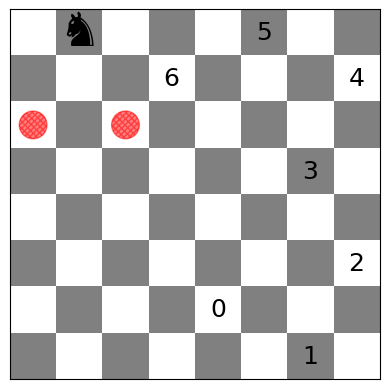

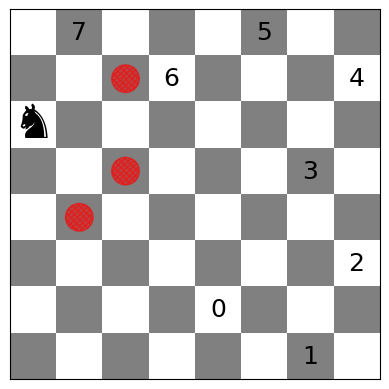

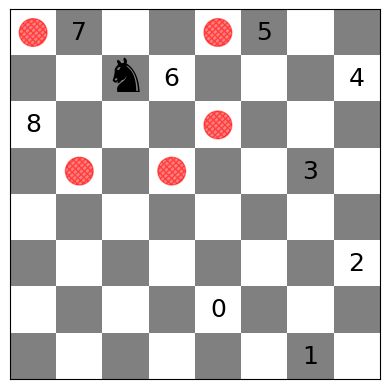

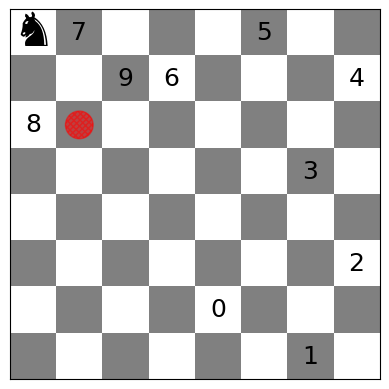

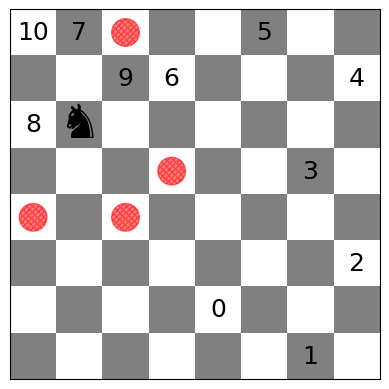

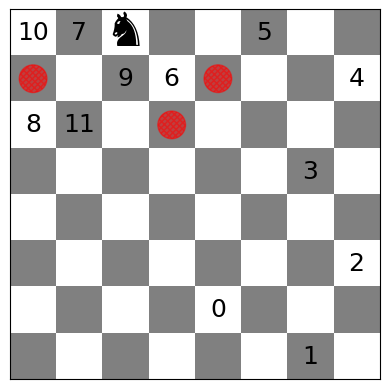

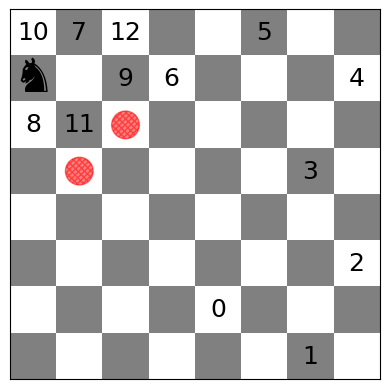

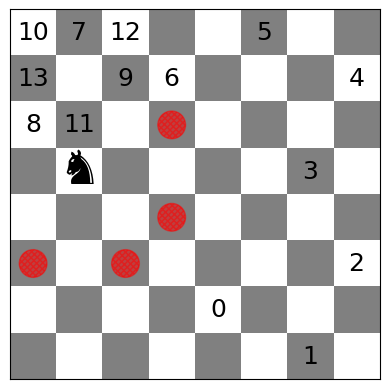

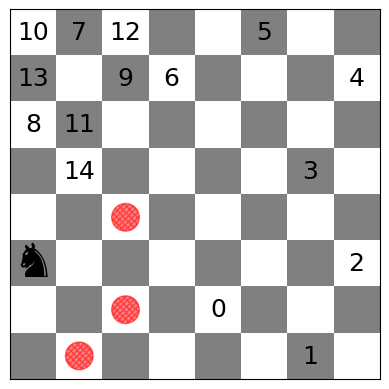

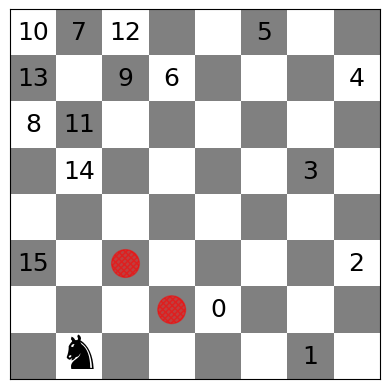

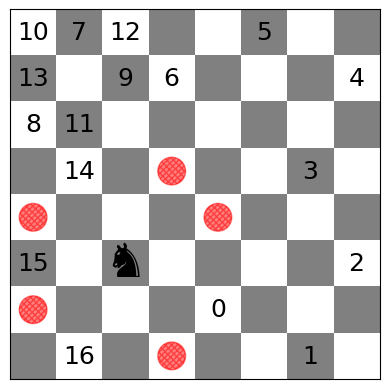

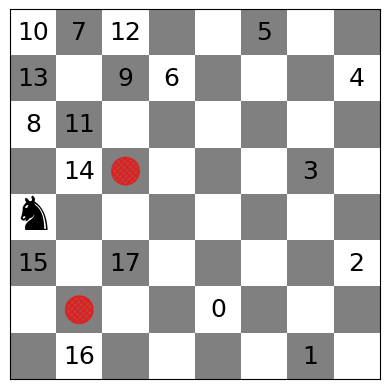

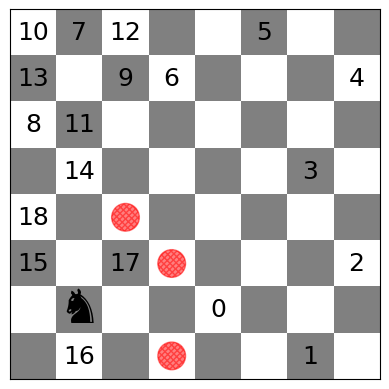

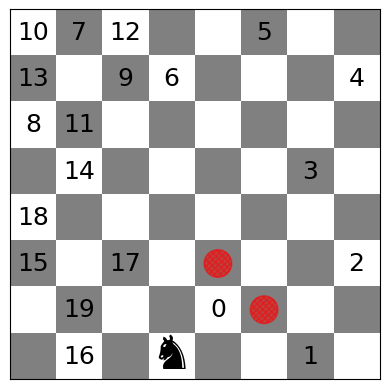

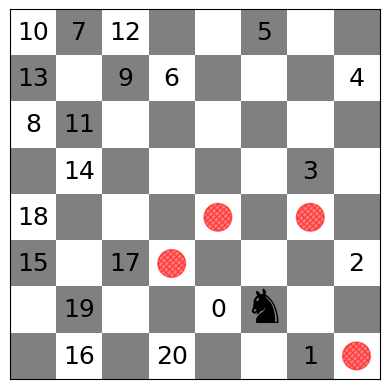

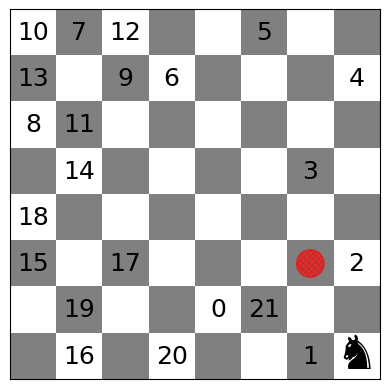

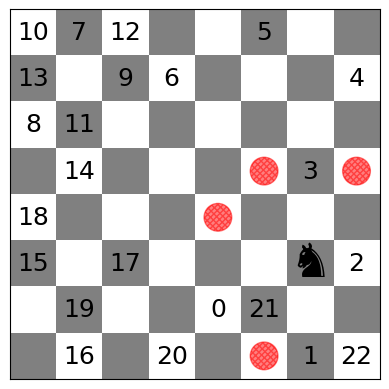

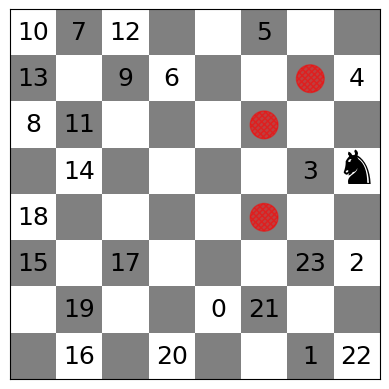

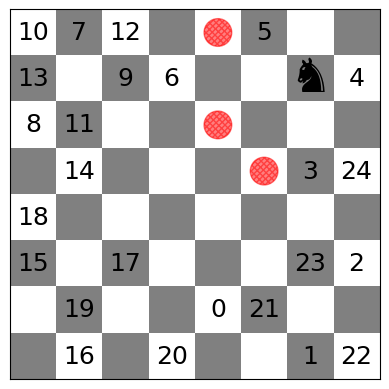

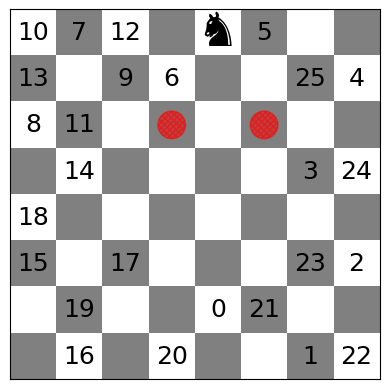

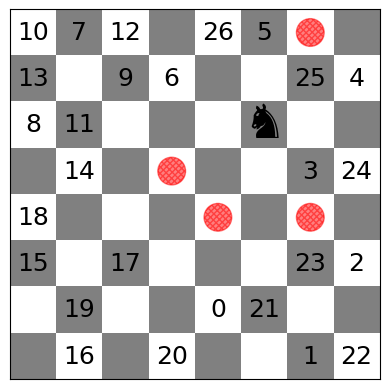

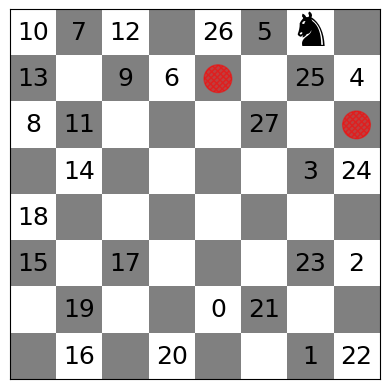

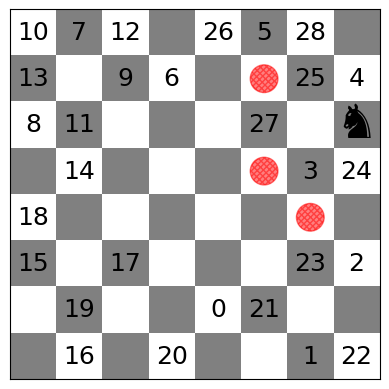

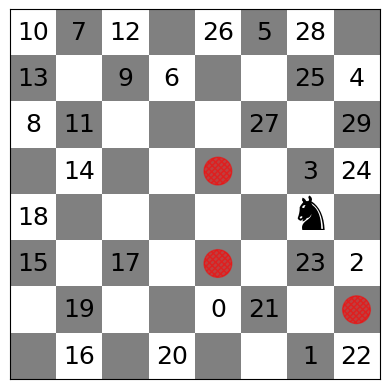

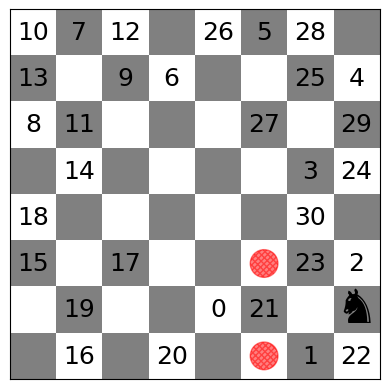

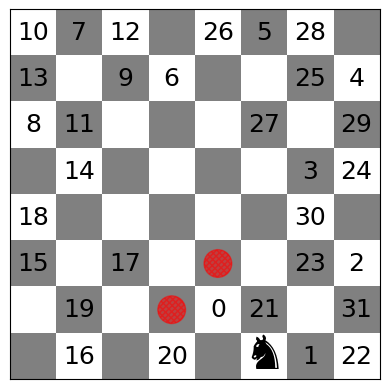

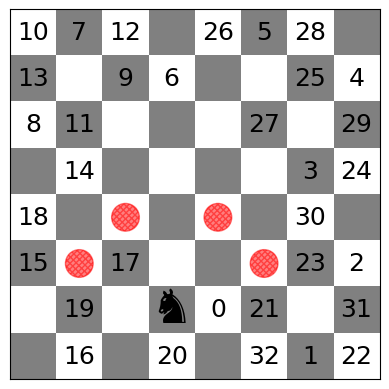

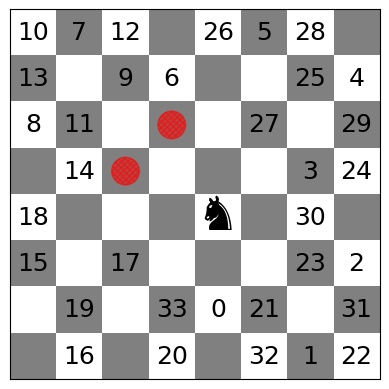

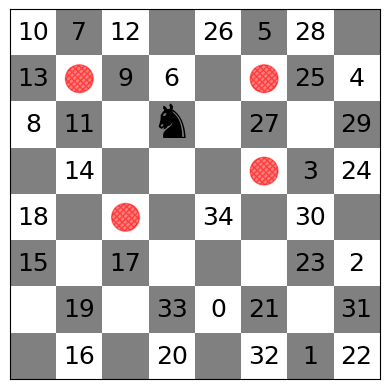

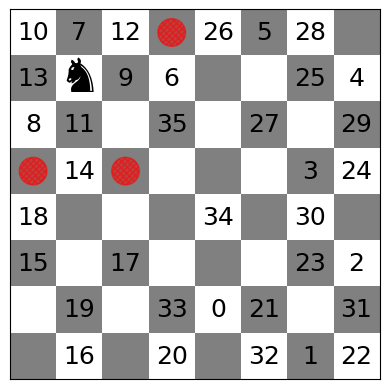

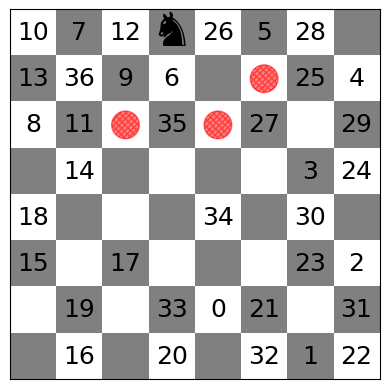

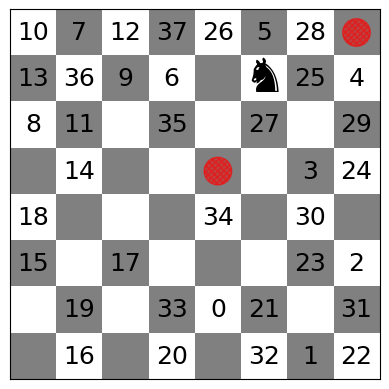

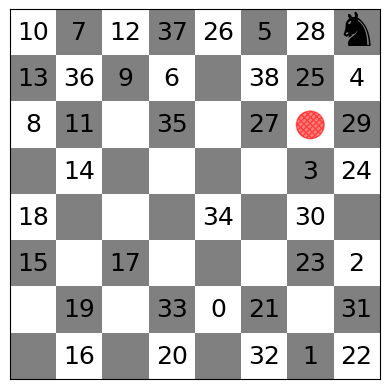

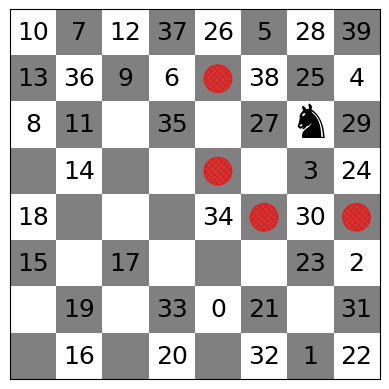

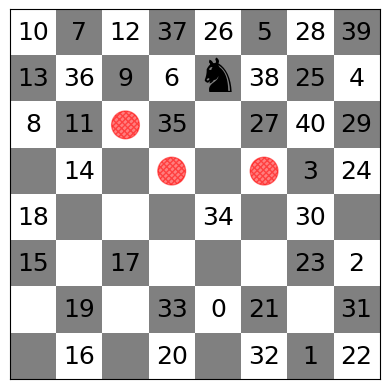

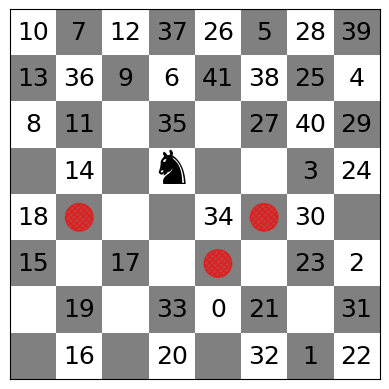

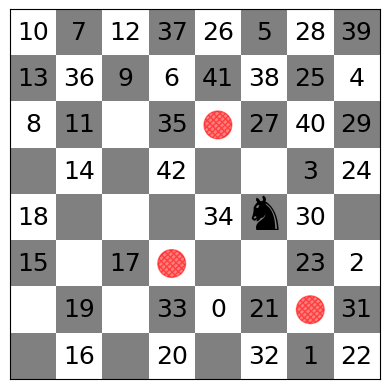

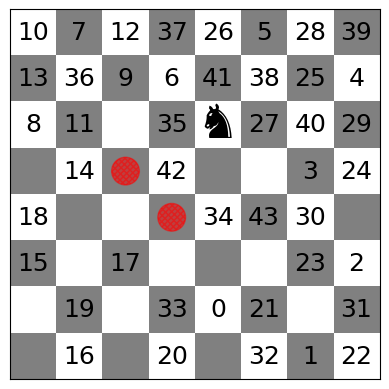

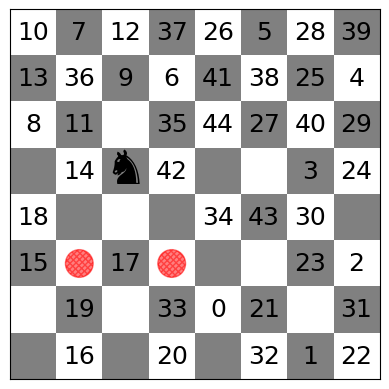

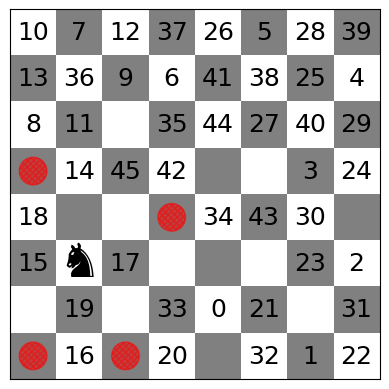

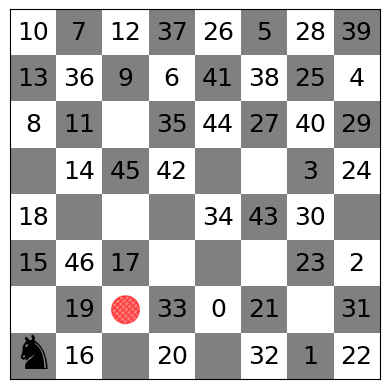

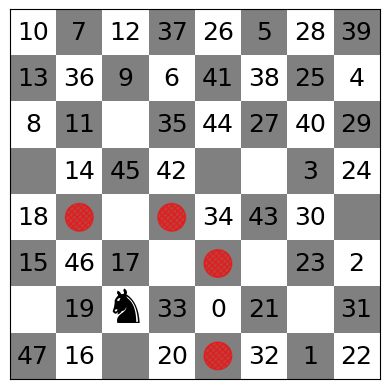

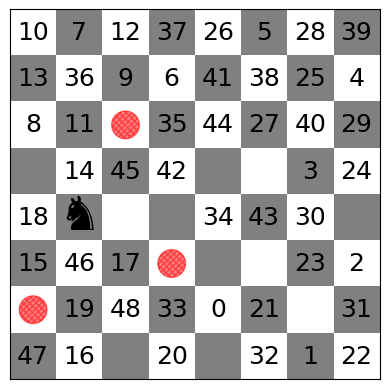

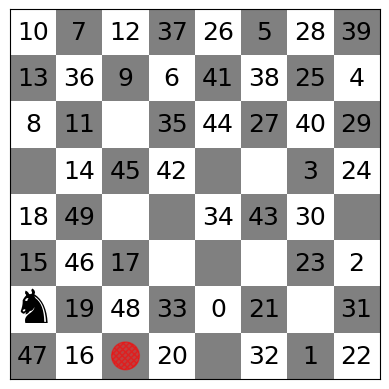

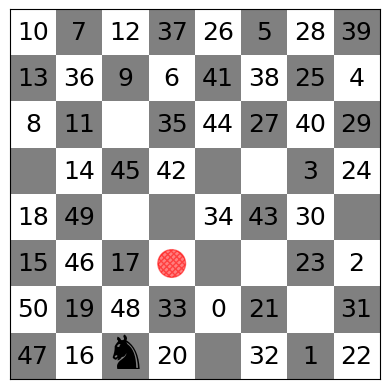

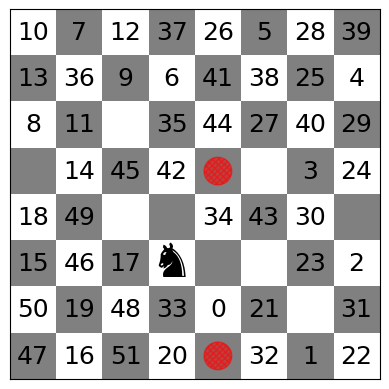

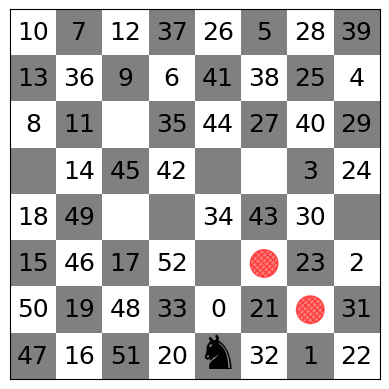

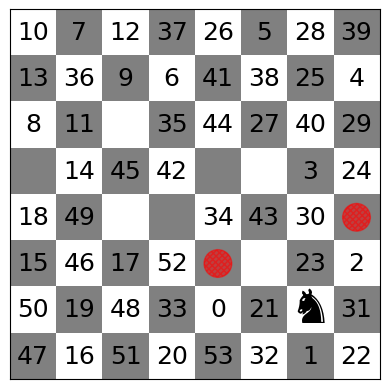

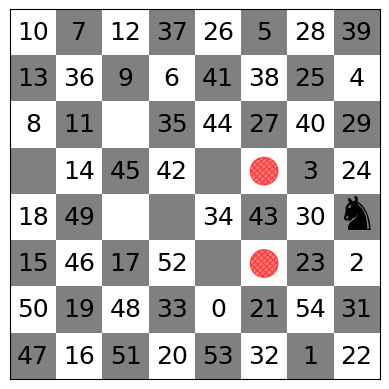

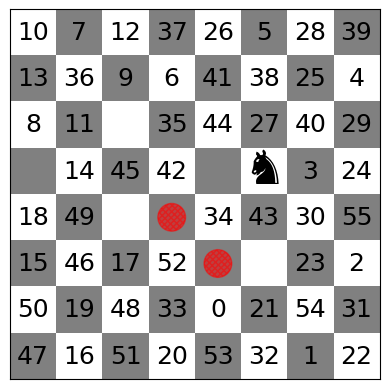

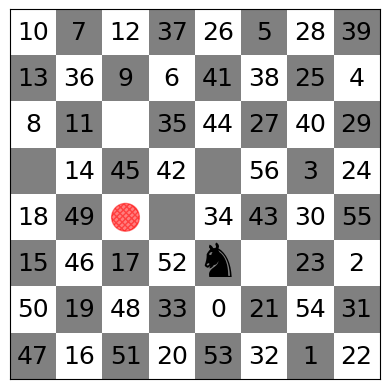

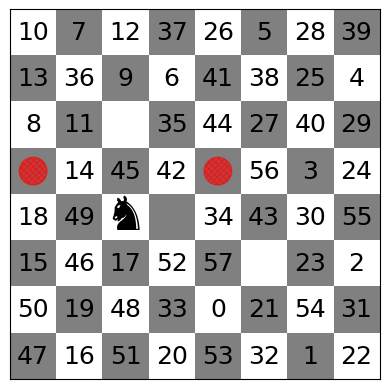

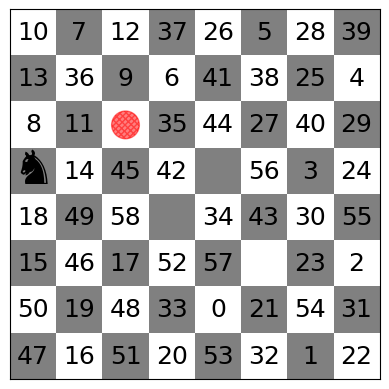

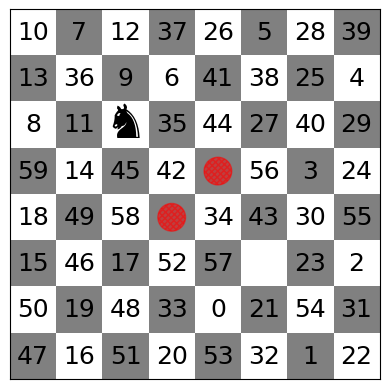

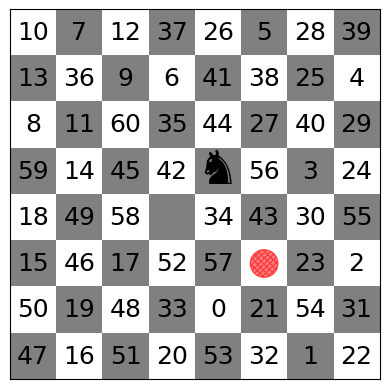

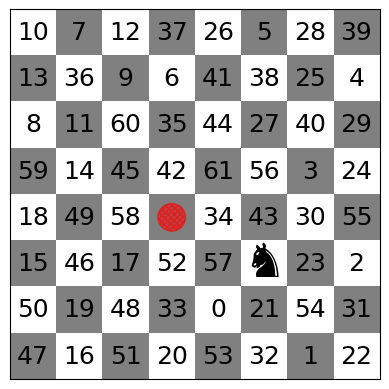

tempo de execução:  10.47 s


In [14]:
n = 8 # Tamanho do tabuleiro

# Gerar uma posição inicial aleatória
start_row = np.random.randint(0, n)
start_col = np.random.randint(0, n)

# Criar o tabuleiro e definir a posição inicial do cavalo
board = random_board(n)
board[start_row][start_col] = 0
path = []
path.append((start_row, start_col))

# Resolver o problema do Passeio do Cavalo
t0 = time.time()
solve_by_backtracking(board, n, start_row, start_col, 1, path)
t1 = time.time()
t = t1-t0
print("tempo de execução: ", f"{t:.2f}", "s")